In [0]:
from fastai import *
from fastai.text import *

In [0]:
df_train = pd.read_csv('base_treino.csv',sep='|',encoding='utf-8')
df_train.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula2179,Este pomada é indicada para o alívio das manif...,This ointment is indicated for the relief of i...,D,D07,D07B,D07B1
1,bula96,Replenine-VF é indicado no tratamento de episó...,Replenine-VF is indicated for the treatment of...,B,B02,B02D,B02D2
2,bula1835,Hipertensão captopril é indicado para o tratam...,Hypertension Captopril is indicated for the tr...,C,C09,C09A,C09A0
3,bula1590,Transpulmin xarope é um expectorante destinado...,Transpulmin syrup is an expectorant intended f...,R,R05,R05C,R05C0
4,bula4244,Dutasterida trata e previne a progressão da hi...,Dutasterida treats and prevents the progressio...,G,G04,G04C,G04C3


In [0]:
df_valid= pd.read_csv('base_teste.csv',sep='|',encoding='utf-8')
df_valid.head()

,Arquivo,indicacao,indication,ATC_1,ATC_2,ATC_3,ATC_4
0,bula292,Cloridrato de ranitidina é indicado no tratame...,Hydrochloride Ranitidina is indicated for the ...,A,A02,A02B,A02B1
1,bula7742,"Hipercolesterolemia Primária ezetimiba, admini...","Primary Hypercholesterolaemia ezetimibe, admin...",C,C10,C10A,C10A9
2,bula2854,SURVANTAr beractanto é destinado à prevenção e...,SURVANTAr Beractant is intended for the preven...,R,R07,R07C,R07C0
3,bula2326,GASTROBENE está indicado para - distúrbios da ...,GASTROBENE is indicated for-disorders of gastr...,A,A03,A03F,A03F0
4,bula3390,Hidrofluxr é destinado ao tratamento da hipert...,HYDROFLUXR is intended for the treatment of ar...,C,C03,C03A,C03A3


In [0]:
data_lm = TextLMDataBunch.from_df('.',train_df=df_train,valid_df=df_valid,text_cols='indication',label_cols='ATC_1')

In [0]:
data_lm.show_batch()

idx,text
0,"dermatitis , xxmaj dermatitis , stase dermatitis and anogenital pruritus . xxbos xxmaj xxunk - xxup xxunk is indicated for the treatment of hemorrhagic episodes and in the maintenance of plasma levels of factor xxup ix in patients diagnosed with haemophilia xxup b. xxbos xxmaj hypertension xxmaj captopril is indicated for the treatment of hypertension , because it reduces blood pressure in these cases . xxmaj heart xxmaj failure xxmaj"
1,"tinea manuum , tinea corporis , tinea inguinalis , xxmaj pityriasis versicolor . xxmaj additionally xxmaj canestenr xxmaj cream is indicated for the treatment of infections of the external genitals and adjacent areas in the woman , as well as inflammation of the glans and foreskin of the sexual partner caused by yeast xxmaj vulvitis and balanitis by xxmaj candida . xxbos xxmaj this xxmaj medicine is an antiseptic of"
2,"with urticaria , such as pruritus , and reduction in the size and number of rashes . xxbos xxmaj piperacillin sodium xxmaj tazobactam xxmaj sodium is indicated for the treatment of the following systemic and / or local bacterial infections caused by xxmaj gram - positive and xxmaj gram - negative aerobic and anaerobic microorganisms susceptible to piperacillin / tazobactam or to xxmaj piperacillin xxmaj adult xxmaj patients 1 ."
3,perennial allergic rhinitis or seasonal contact dermatitis atopic dermatitis xxmaj serum diseases hypersensitivity reactions to xxmaj drugs . -ophthalmic xxmaj diseases xxmaj acute and severe chronic inflammatory and allergic xxmaj processes involving the eye and its attachments as marginal allergic ulcers of the corneal herpes zoster ophthalmic inflammation of the anterior segment xxmaj choriditis and posterior diffuse uvete ophthalmomia xxmaj sympathetic conjunctivitis allergic keratitis xxmaj chorioretinitis optic neuritis iritis and
4,"region and over time . xxmaj where available , local sensitivity data should be consulted . xxmaj when necessary , microbiological sampling tests and sensitivity tests should be performed . xxbos xxmaj the betamethasone valerate of gentamicin tolnafate clioquinol sulfate is indicated for the relief of inflammatory manifestations of corticosteroid - responsive dermatoses , when complicated by secondary infection caused by microorganisms xxmaj sensitive to the components of its formulation"


In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


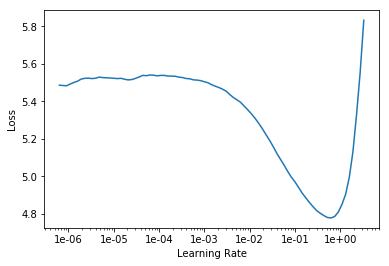

In [0]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.423172,2.575435,0.486890,00:38
1,2.389271,1.857505,0.604490,00:39
2,1.883408,1.653110,0.650215,00:38
3,1.767088,1.673039,0.653331,00:38
4,1.831669,1.740155,0.642333,00:38
5,1.904123,1.815939,0.638213,00:39
6,2.047624,1.913334,0.624914,00:38
7,2.141899,1.927163,0.625429,00:39
8,2.192898,1.931326,0.625146,00:39
9,2.137714,1.901800,0.635002,00:39


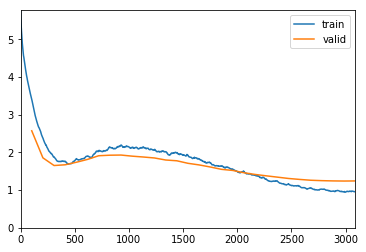

Better model found at epoch 0 with accuracy value: 0.4868904650211334.
Better model found at epoch 1 with accuracy value: 0.6044899821281433.
Better model found at epoch 2 with accuracy value: 0.6502146124839783.
Better model found at epoch 3 with accuracy value: 0.65333092212677.
Better model found at epoch 12 with accuracy value: 0.660130500793457.
Better model found at epoch 14 with accuracy value: 0.6736951470375061.
Better model found at epoch 15 with accuracy value: 0.6776613593101501.
Better model found at epoch 16 with accuracy value: 0.6933206915855408.
Better model found at epoch 17 with accuracy value: 0.7047045826911926.
Better model found at epoch 18 with accuracy value: 0.7112207412719727.
Better model found at epoch 19 with accuracy value: 0.7213169932365417.
Better model found at epoch 20 with accuracy value: 0.7319883704185486.
Better model found at epoch 21 with accuracy value: 0.7396290898323059.
Better model found at epoch 22 with accuracy value: 0.7481370568275452.

In [0]:
max_lr = 1e-1
learn_lm.fit_one_cycle(30, max_lr=max_lr, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm')])

In [0]:
#Carrego a melhor versão do language model
learn_lm.load('learn_lm')
learn_lm.save_encoder('enc')

In [0]:
data_clas = TextClasDataBunch.from_df('.',train_df=df_train,valid_df=df_valid,text_cols='indication',label_cols='ATC_1')
data_clas.save('data_clas')

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj simethicone is indicated for the relief of symptoms in the case of excess gases in the gastrointestinal tract constituting a cause of pain or cramps intestinais1 , such as - meteorismo1-eructação1-borborigmos1-post - surgical xxmaj aerophagia 1-distension xxmaj abdominal1- xxmaj flatulencya1 knowing that the gases in the digestive tract disrupt the abdominal imaging exams and the xxmaj simethicone facilitates the elimination of gases , this medication can be used",A
"xxbos xxup decadron injectable is intended for the treatment of conditions in which the anti - inflammatory and immunosuppressive effects of corticosteroids are desired , especially for intensive treatment during shorter periods . xxmaj specific xxmaj indications xxup a. xxmaj by intravenous or intramuscular injection , when oral therapy is not feasible primary adrenocortical xxmaj insufficiency injectable xxup decadron has predominantly glucocorticoid activity , with low activity xxmaj mineralocorticoid .",H
xxbos pneumovaxtm 23 is indicated for vaccination against pneumococcal disease caused by the types of xxmaj pneumococci included in the vaccine . xxmaj the efficacy of the vaccine in the prevention of pneumococcal pneumonia and pneumococcal bacteremia has been demonstrated in controlled clinical studies in xxmaj south xxmaj xxunk and xxmaj xxunk and in case - control studies . pneumovaxtm 23 does not prevent against diseases caused by xxunk types,J
"xxbos xxmaj treatment hydrochloride xxmaj doxycycline is indicated in the treatment of the following infections xxmaj rocky xxmaj mountain fever , typhoid and tiphoid group q fever , xxunk and tick fever caused by rickettsia respiratory infection caused by xxmaj mycoplasma xxmaj pneumoniae xxmaj psittacosis xxmaj caused by xxmaj chlamydia xxmaj psittaci xxmaj lymphogranuloma xxmaj xxunk caused by xxmaj chlamydia xxmaj trachomatis xxmaj uncomplicated xxmaj xxunk , xxmaj xxunk or",J
"xxbos xxmaj gentamicin sulfate of xxmaj gentamicin is indicated for the treatment of infections caused by strains of susceptible bacteria of the following microorganisms xxmaj pseudomonas aeruginosa , xxmaj proteus sp . indol - xxmaj positive and indol - negative , xxmaj escherichia coli , xxmaj klebsiella - xxmaj enterobacter - xxmaj serratia sp . , xxmaj citrobacter sp . , xxmaj providencia sp . , xxmaj staphylococcus sp .",J


In [0]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, callback_fns=ShowGraph)
learn_clas.load_encoder('enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


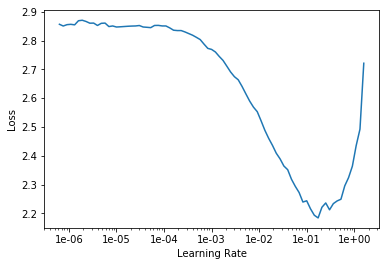

In [0]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.524639,0.820411,0.806959,00:26
1,1.032928,0.597499,0.859155,00:23
2,0.843252,0.500971,0.871582,00:25
3,0.721665,0.509819,0.864126,00:28
4,0.693347,0.502222,0.860812,00:24
5,0.727372,0.410931,0.899751,00:27
6,0.685965,0.470665,0.873239,00:25
7,0.606509,0.443054,0.884838,00:24
8,0.634753,0.406694,0.893123,00:26
9,0.629459,0.432248,0.877382,00:26


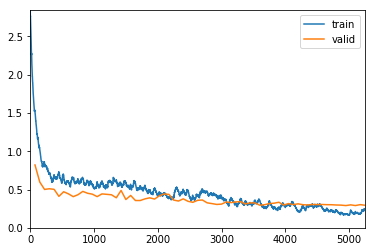

Better model found at epoch 0 with accuracy value: 0.8069593906402588.
Better model found at epoch 1 with accuracy value: 0.8591549396514893.
Better model found at epoch 2 with accuracy value: 0.8715824484825134.
Better model found at epoch 5 with accuracy value: 0.8997514247894287.
Better model found at epoch 13 with accuracy value: 0.9063794612884521.
Better model found at epoch 21 with accuracy value: 0.908036470413208.
Better model found at epoch 22 with accuracy value: 0.9096934795379639.
Better model found at epoch 25 with accuracy value: 0.9163214564323425.
Better model found at epoch 29 with accuracy value: 0.9212924838066101.
Better model found at epoch 37 with accuracy value: 0.9262634515762329.
Better model found at epoch 38 with accuracy value: 0.9304059743881226.
Better model found at epoch 40 with accuracy value: 0.9320629835128784.
Better model found at epoch 48 with accuracy value: 0.9337199926376343.
Better model found at epoch 59 with accuracy value: 0.935376942157745

In [0]:
max_lr = 3e-2
learn_clas.fit_one_cycle(70, max_lr=max_lr , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

In [0]:
learn_clas.load('learn_clas9386')

In [0]:
interp = ClassificationInterpretation.from_learner(learn_clas)

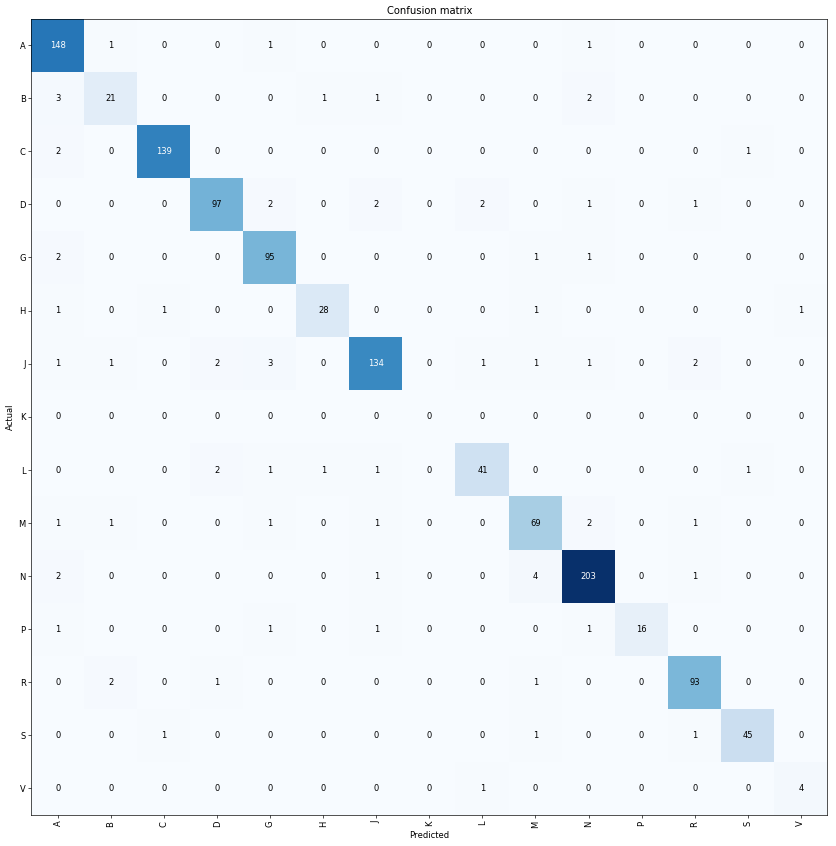

In [0]:
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)